In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

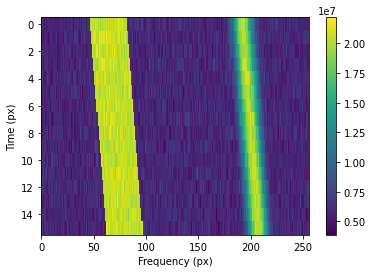

In [35]:
fchans=256
tchans=16

frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)

frame.add_noise_from_obs()
noise_mean, noise_std = frame.get_noise_stats()

start_index = 64
end_index = start_index + 16
drift_rate = frame.get_drift_rate(start_index, end_index)

snr = 100

signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=start_index),
                                            drift_rate=drift_rate*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=snr)),
                          stg.box_f_profile(width=100*u.Hz),
                          stg.constant_bp_profile(level=1))


def sinc2_f_profile(width):
    width = stg.unit_utils.get_value(width, u.Hz)
    
    def f_profile(f, f_center):
        return np.where(np.abs(f - f_center) < width / 2, 
                        np.sinc((f - f_center) / (width / 2)),
                        0)**2
    return f_profile


signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=start_index+128),
                                            drift_rate=drift_rate*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=snr)),
                          sinc2_f_profile(width=100*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()

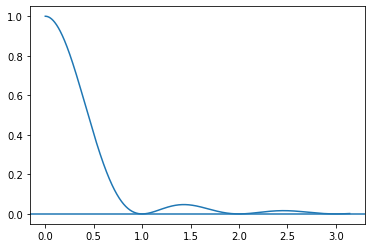

In [36]:
plt.plot(np.linspace(0, np.pi, 1000),np.sinc(np.linspace(0, np.pi, 1000))**2)
plt.axhline(0)

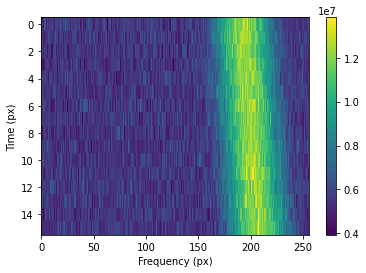

In [59]:
fchans=256
tchans=16

frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)

frame.add_noise_from_obs()
noise_mean, noise_std = frame.get_noise_stats()

start_index = 64
end_index = start_index + 16
drift_rate = frame.get_drift_rate(start_index, end_index)

snr = 100

# signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=start_index),
#                                             drift_rate=drift_rate*u.Hz/u.s),
#                           stg.constant_t_profile(level=1),
#                           stg.box_f_profile(width=30*u.Hz),
#                           stg.constant_bp_profile(level=1))


# def sinc2_f_profile(width):
#     width = stg.unit_utils.get_value(width, u.Hz)
    
#     def f_profile(f, f_center):
#         return np.where(np.abs(f - f_center) < width / 2, 
#                         np.sinc((f - f_center) / (width / 2)),
#                         0)**2
#     return f_profile

def sinc2_f_profile(width, trunc=True):
    width = stg.unit_utils.get_value(width, u.Hz)
    
    def f_profile(f, f_center):
        if trunc:
            return np.where(np.abs(f - f_center) < width / 2, 
                            np.sinc((f - f_center) / (width / 2)),
                            0)**2
        else:
            return np.sinc((f - f_center) / (width / 2))**2
    return f_profile


signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=start_index+128),
                                            drift_rate=drift_rate*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          sinc2_f_profile(width=100*2.8*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()